In [1]:
import os
import torch
from torchmeta.datasets import Omniglot

os.getcwd()

'D:\\Learn\\Code\\MetaLearning\\Few-Shot-Classification-on-Omniglot-Dataset\\notebooks'

In [11]:
dataset = Omniglot(root=os.getcwd(), num_classes_per_task=5, meta_train=True, download=True)
dataset

In [19]:
class_splitter = ClassSplitter(shuffle=True,
                               num_train_per_class=1 + 1,
                               num_test_per_class=1)
omniglot_dataset = class_splitter.split(dataset)

omniglot_dataset

AttributeError: 'ClassSplitter_' object has no attribute 'split'

In [ ]:
# Create the meta-dataset
dataset = CombinationMetaDataset(omniglot_dataset,
                                 num_classes_per_task=self.num_classes_per_task,
                                 num_shots=self.num_shots,
                                 num_ways=self.num_ways,
                                 tasks_per_epoch=self.num_tasks)


In [18]:
dataset.__getitem__((0, 1, 2, 3, 4)).__getitem__(3)

(<PIL.Image.Image image mode=L size=105x105>,
 ('images_background/Alphabet_of_the_Magi/character01', 0))

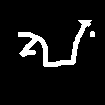

In [4]:
dataset.__getitem__((0, 1, 2, 3, 4)).__getitem__(19)[0]

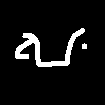

In [5]:
dataset.__getitem__((0, 1, 2, 3, 4)).__getitem__(1)[0]

# Code from ChatGPT for dattamodule

In [40]:
from torchmeta.datasets import Omniglot
from torchmeta.utils.data import BatchMetaDataLoader
from torchmeta.transforms import Categorical, ClassSplitter
from torchmeta.utils.data import CombinationMetaDataset
from torchvision.transforms import ToTensor
from pytorch_lightning import LightningDataModule
import torch

class OmniglotDataModule(LightningDataModule):
    def __init__(self, root, num_classes_per_task=5, num_shots=1, num_ways=5, num_tasks=1000):
        super().__init__()
        self.root = root
        self.num_classes_per_task = num_classes_per_task
        self.num_shots = num_shots
        self.num_ways = num_ways
        self.num_tasks = num_tasks
        
    def prepare_data(self):
        # Load the Omniglot dataset
        omniglot_dataset = Omniglot(root=self.root,
                                    num_classes_per_task=self.num_classes_per_task,
                                    transform=ToTensor(),
                                    meta_split="train")
        
#         # Split the dataset into classes
#         omniglot_dataset = ClassSplitter(omniglot_dataset, shuffle=True,
#                                        num_train_per_class=self.num_shots + 1,
#                                        num_test_per_class=1)
#         # omniglot_dataset = class_splitter.split(omniglot_dataset)

#         # Create the meta-dataset
#         dataset = CombinationMetaDataset(omniglot_dataset,
#                                          num_classes_per_task=self.num_classes_per_task)
#                                          # num_shots=self.num_shots,
#                                          # num_ways=self.num_ways,
#                                          # tasks_per_epoch=self.num_tasks)
        
        self.dataset = omniglot_dataset

    def train_dataloader(self):
        # Create the data loader
        dataloader = BatchMetaDataLoader(self.dataset,
                                         batch_size=1,
                                         shuffle=True,
                                         num_workers=4)
        return dataloader

    def val_dataloader(self):
        # Create the data loader
        dataloader = BatchMetaDataLoader(self.dataset,
                                         batch_size=1,
                                         shuffle=True,
                                         num_workers=4)
        return dataloader

    def test_dataloader(self):
        # Create the data loader
        dataloader = BatchMetaDataLoader(self.dataset,
                                         batch_size=1,
                                         shuffle=True,
                                         num_workers=4)
        return dataloader



In [41]:
dm = OmniglotDataModule(root=os.getcwd(), 
                        num_classes_per_task=5, 
                        num_shots=1, 
                        num_ways=5, 
                        num_tasks=1000)

In [42]:
dm.prepare_data()

In [52]:
len(dm.train_dataloader())

9474438804480

In [53]:
from tqdm import tqdm

# Training loop
with tqdm(dm.train_dataloader(), total=len(dm.train_dataloader())) as pbar:
    for batch_idx, batch in enumerate(pbar):        
        break

  0%|                                                                                                                                      | 0/9474438804480 [00:00<?, ?it/s]

[tensor([[[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],


         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],


         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],


         ...,


         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
    

  0%|                                                                                                                                      | 0/9474438804480 [00:02<?, ?it/s]


In [58]:
batch[0].shape

torch.Size([1, 100, 1, 105, 105])

In [59]:
batch[1]

[[('images_background/Balinese/character11',),
  ('images_background/Balinese/character11',),
  ('images_background/Balinese/character11',),
  ('images_background/Balinese/character11',),
  ('images_background/Balinese/character11',),
  ('images_background/Balinese/character11',),
  ('images_background/Balinese/character11',),
  ('images_background/Balinese/character11',),
  ('images_background/Balinese/character11',),
  ('images_background/Balinese/character11',),
  ('images_background/Balinese/character11',),
  ('images_background/Balinese/character11',),
  ('images_background/Balinese/character11',),
  ('images_background/Balinese/character11',),
  ('images_background/Balinese/character11',),
  ('images_background/Balinese/character11',),
  ('images_background/Balinese/character11',),
  ('images_background/Balinese/character11',),
  ('images_background/Balinese/character11',),
  ('images_background/Balinese/character11',),
  ('images_background/Ojibwe_(Canadian_Aboriginal_Syllabics)

# Test Datamodule

In [42]:
from typing import Any, Dict, Optional, Tuple
from torchmeta.datasets import Omniglot
from torchvision.transforms import transforms, ToTensor
from torchmeta.utils.data import BatchMetaDataLoader, CombinationMetaDataset
from torchmeta.transforms import Categorical, Rotation, ClassSplitter
from pytorch_lightning import LightningDataModule
import torch

class MetaDataModule(LightningDataModule):
    def __init__(
        self,
        data_dir: str = "data/",
        kshot: int = 5,
        nway: int = 5,
        batch_size: int = 64,
        num_workers: int = 2,
        pin_memory: bool = False,
    ):
        super().__init__()

        # this line allows to access init params with 'self.hparams' attribute
        # also ensures init params will be stored in ckpt
        self.save_hyperparameters(logger=False)

        # data transformations
        self.transforms = transforms.Compose(
            [transforms.Resize(size=28),
             transforms.ToTensor(), 
             transforms.Normalize((0.1307,), (0.3081,))]
        )

        # target transformations
        self.target_transform = Categorical()

        # class augmentations
        self.class_augmentations = [Rotation(angle=a) for a in [90, 180, 270]]

        self.data_train: Optional[Dataset] = None
        self.data_val: Optional[Dataset] = None
        self.data_test: Optional[Dataset] = None

    @property
    def num_classes(self):
        return self.hparams.nway

    def prepare_data(self):
        """Download data if needed.

        Do not use it to assign state (self.x = y).
        """
        Omniglot(root=self.hparams.data_dir, num_classes_per_task=self.hparams.nway, meta_split="train", download=True)
        Omniglot(root=self.hparams.data_dir, num_classes_per_task=self.hparams.nway, meta_split="val", download=True)
        Omniglot(root=self.hparams.data_dir, num_classes_per_task=self.hparams.nway, meta_split="test", download=True)

    def setup_dataset(self, meta_split="train"):
        dataset = Omniglot(
            root=self.hparams.data_dir,
            num_classes_per_task=self.hparams.nway,
            # transform=self.transforms,
            # target_transform=self.target_transform,
            # class_augmentations=self.class_augmentations,
            meta_split=meta_split, 
            download=False)
        print(len(dataset))
        dataset.seed(42)
        dataset = ClassSplitter(
            dataset,
            shuffle=True,
            random_state_seed=42,
            num_support_per_class=self.hparams.kshot,
            num_query_per_class=self.hparams.kshot)
        return dataset

    def setup(self, stage: Optional[str] = None):
        # load and split datasets only if not loaded already
        if stage is None or stage == "fit":
            self.data_train = self.setup_dataset("train")
            self.data_val = self.setup_dataset("val")
        if stage == "test":
            self.data_test = self.setup_dataset("test")

    def train_dataloader(self):
        return BatchMetaDataLoader(
            dataset=self.data_train,
            batch_size=self.hparams.batch_size,
            num_workers=self.hparams.num_workers,
            pin_memory=self.hparams.pin_memory,
            shuffle=True,
        )

    def val_dataloader(self):
        return BatchMetaDataLoader(
            dataset=self.data_val,
            batch_size=self.hparams.batch_size,
            num_workers=self.hparams.num_workers,
            pin_memory=self.hparams.pin_memory,
            shuffle=False,
        )

    def test_dataloader(self):
        return BatchMetaDataLoader(
            dataset=self.data_test,
            batch_size=self.hparams.batch_size,
            num_workers=self.hparams.num_workers,
            pin_memory=self.hparams.pin_memory,
            shuffle=False,
        )


dm = MetaDataModule()
# dm.prepare_data()
dm.setup()

9474438804480
1183009464


In [76]:
len(dm.train_dataloader()) /len(dm.val_dataloader())

8008.759886311375

In [74]:
len(dm.val_dataloader())

18484523

In [88]:
import random
from torch.utils.data import ConcatDataset, DataLoader, Dataset, random_split, Subset

a = Subset(dm.data_train, random.sample(range(len(dm.data_train)), 10000))
len(a)

10000

In [146]:
i = random.sample(range(len(dm.data_train)), 5)
print(i)
dm.data_train[20, 20, 20, 1027, 1027]

[72456202622, 3229094326080, 8197011685343, 7348473393976, 4594789866374]


OrderedDict([('support',
              <torchmeta.utils.data.task.SubsetTask at 0x1a431b72310>),
             ('query',
              <torchmeta.utils.data.task.SubsetTask at 0x1a431b72370>)])

In [156]:
dm.data_train.__getitem__([0, 1, 2, 3, 4])

OrderedDict([('support',
              <torchmeta.utils.data.task.SubsetTask at 0x1a431ba97f0>),
             ('query',
              <torchmeta.utils.data.task.SubsetTask at 0x1a431ba9850>)])

In [155]:
help(dm.data_train)

Help on Omniglot in module torchmeta.datasets.omniglot object:

class Omniglot(torchmeta.utils.data.dataset.CombinationMetaDataset)
 |  Omniglot(root, num_classes_per_task=None, meta_train=False, meta_val=False, meta_test=False, meta_split=None, use_vinyals_split=True, transform=None, target_transform=None, dataset_transform=None, class_augmentations=None, download=False)
 |  
 |  The Omniglot dataset [1]. A dataset of 1623 handwritten characters from 
 |  50 different alphabets. 
 |  
 |  Parameters
 |  ----------
 |  root : string
 |      Root directory where the dataset folder `omniglot` exists.
 |  
 |  num_classes_per_task : int
 |      Number of classes per tasks. This corresponds to "N" in "N-way" 
 |      classification.
 |  
 |  meta_train : bool (default: `False`)
 |      Use the meta-train split of the dataset. If set to `True`, then the
 |      arguments `meta_val` and `meta_test` must be set to `False`. Exactly one 
 |      of these three arguments must be set to `True`.
 

In [162]:
"""
Copy from torchmeta.utils.data.sampler.CombinationRandomSampler
Add num_samples parameter to __init__ for select num_samples from dataset
"""

import random
import warnings
from itertools import combinations
from torch.utils.data.sampler import RandomSampler

from torchmeta.utils.data.dataset import CombinationMetaDataset


class CombinationRandomSampler(RandomSampler):
    def __init__(self, data_source, num_samples):
        if not isinstance(data_source, CombinationMetaDataset):
            raise TypeError('Expected `data_source` to be an instance of '
                            '`CombinationMetaDataset`, but found '
                            '{0}'.format(type(data_source)))
        # Temporarily disable the warning if the length of the length of the 
        # dataset exceeds the machine precision. This avoids getting this
        # warning shown with MetaDataLoader, even though MetaDataLoader itself
        # does not use the length of the dataset.
        with warnings.catch_warnings():
            warnings.simplefilter('ignore')
            super(CombinationRandomSampler, self).__init__(data_source,
                                                           replacement=True,
                                                           num_samples=num_samples)

    def __iter__(self):
        num_classes = len(self.data_source.dataset)
        num_classes_per_task = self.data_source.num_classes_per_task
        for _ in combinations(range(num_classes), num_classes_per_task):
            yield tuple(random.sample(range(num_classes), num_classes_per_task))


In [169]:
next(CombinationRandomSampler(dm.data_train, 10))

TypeError: 'CombinationRandomSampler' object is not an iterator

In [172]:
110*16

1760

In [150]:
9474438804480**(1/5)

393.8317262028157

In [161]:
1028*1027*1026*1025*1024/120

9474438804480.0

In [149]:
1027**5

1142489501553907

In [75]:
len(dm.test_dataloader())

TypeError: object of type 'NoneType' has no len()

In [64]:
dm.data_train.sample_task()

OrderedDict([('support',
              <torchmeta.utils.data.task.SubsetTask at 0x1a43165ad90>),
             ('query',
              <torchmeta.utils.data.task.SubsetTask at 0x1a43165ad00>)])

In [72]:
len(torch.utils.data.Subset(dm.data_train, [*range(10)]))

10

In [71]:
[*range(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [53]:
help(CombinationMetaDataset)

NameError: name 'MetaDataset' is not defined

In [55]:
CombinationMetaDataset

torchmeta.utils.data.dataset.CombinationMetaDataset

In [49]:
help(dm.data_train)

Help on Omniglot in module torchmeta.datasets.omniglot object:

class Omniglot(torchmeta.utils.data.dataset.CombinationMetaDataset)
 |  Omniglot(root, num_classes_per_task=None, meta_train=False, meta_val=False, meta_test=False, meta_split=None, use_vinyals_split=True, transform=None, target_transform=None, dataset_transform=None, class_augmentations=None, download=False)
 |  
 |  The Omniglot dataset [1]. A dataset of 1623 handwritten characters from 
 |  50 different alphabets. 
 |  
 |  Parameters
 |  ----------
 |  root : string
 |      Root directory where the dataset folder `omniglot` exists.
 |  
 |  num_classes_per_task : int
 |      Number of classes per tasks. This corresponds to "N" in "N-way" 
 |      classification.
 |  
 |  meta_train : bool (default: `False`)
 |      Use the meta-train split of the dataset. If set to `True`, then the
 |      arguments `meta_val` and `meta_test` must be set to `False`. Exactly one 
 |      of these three arguments must be set to `True`.
 

In [36]:
9474438804480

9474438804480

In [45]:
9474438804480/592152425280

16.0

In [99]:
152703067340165/5

30540613468033.0

In [4]:
from tqdm import tqdm

# Training loop
with tqdm(dm.train_dataloader(), total=len(dm.train_dataloader())) as pbar:
    for batch_idx, batch in enumerate(pbar):        
        break

  0%|                                                                                                                                                                           | 0/152703067340165 [00:04<?, ?it/s]


In [5]:
print(batch.keys())

x, y = batch['support']
print(x.shape)
print(y.shape)

dict_keys(['support', 'query'])
torch.Size([64, 25, 1, 28, 28])
torch.Size([64, 25])


In [6]:
x, y = batch['query']
print(x.shape)
print(y.shape)

torch.Size([64, 25, 1, 28, 28])
torch.Size([64, 25])


In [7]:
y[2]

tensor([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 2, 2, 2, 2,
        2])